In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
#Load iris dataset
#Date: 24 Jul

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
x = iris.data[:,:2]
y = iris.target

x

#Here only 2 x values are selected for illustration purposes

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
pd.DataFrame(y).value_counts()

0    50
1    50
2    50
dtype: int64

In [7]:
pd.DataFrame(x).describe()

,0,1
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


Encoding, feature scaling, missing value treatment not required as it is all balanced

In [9]:
#Building DT model, split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [10]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
#Predict

y_pred_train = dt_clf.predict(x_train)
y_pred_test = dt_clf.predict(x_test)

In [12]:
# Accuracy
confusion_matrix(y_test, y_pred_test)

array([[14,  1,  0],
       [ 0,  5,  6],
       [ 0,  6,  6]])

In [13]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.42      0.45      0.43        11
           2       0.50      0.50      0.50        12

    accuracy                           0.66        38
   macro avg       0.64      0.63      0.63        38
weighted avg       0.67      0.66      0.66        38



In [15]:
print(accuracy_score(y_train, y_pred_train))

print(accuracy_score(y_test, y_pred_test))

0.9553571428571429
0.6578947368421053


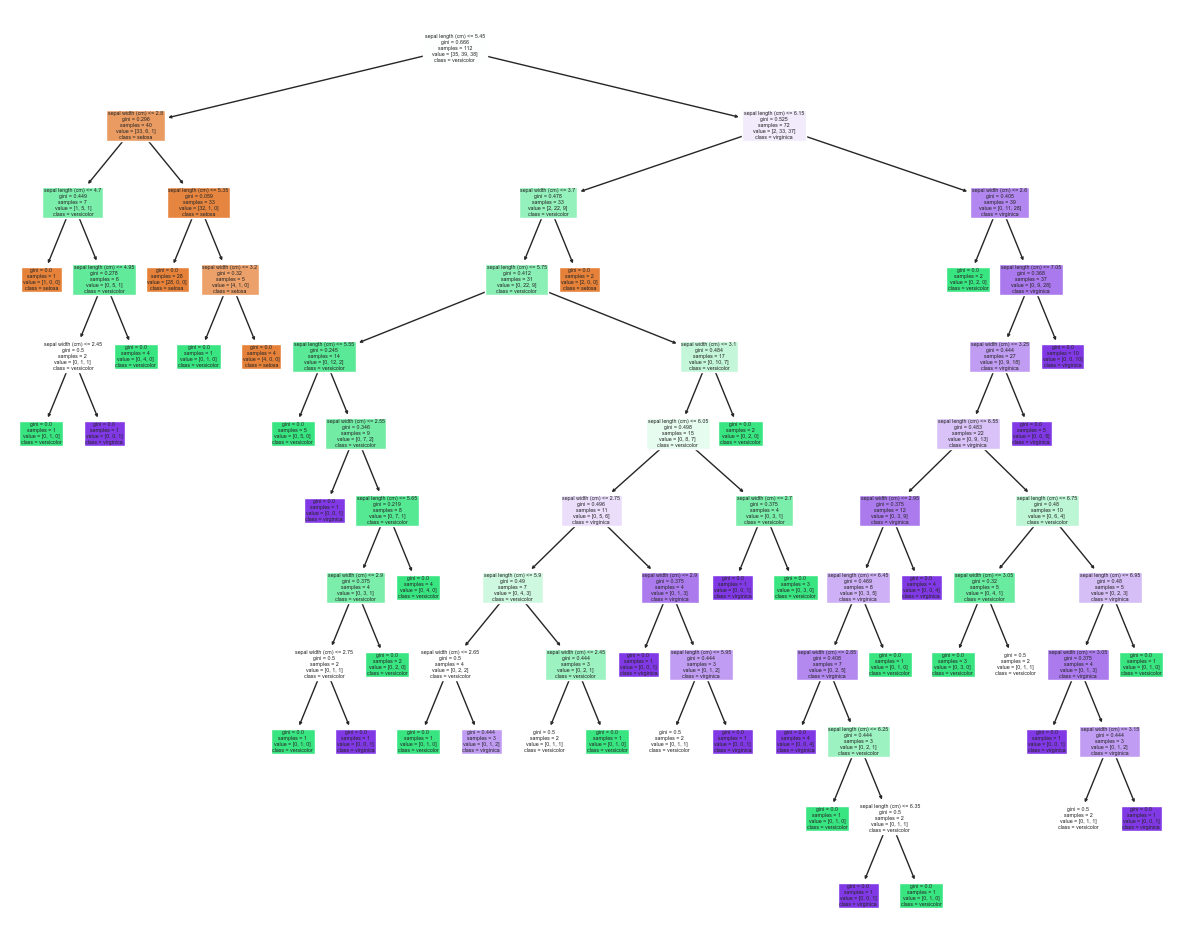

In [17]:
#Plot DT Classifier

plt.figure(figsize=(15,12))
plot_tree(dt_clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

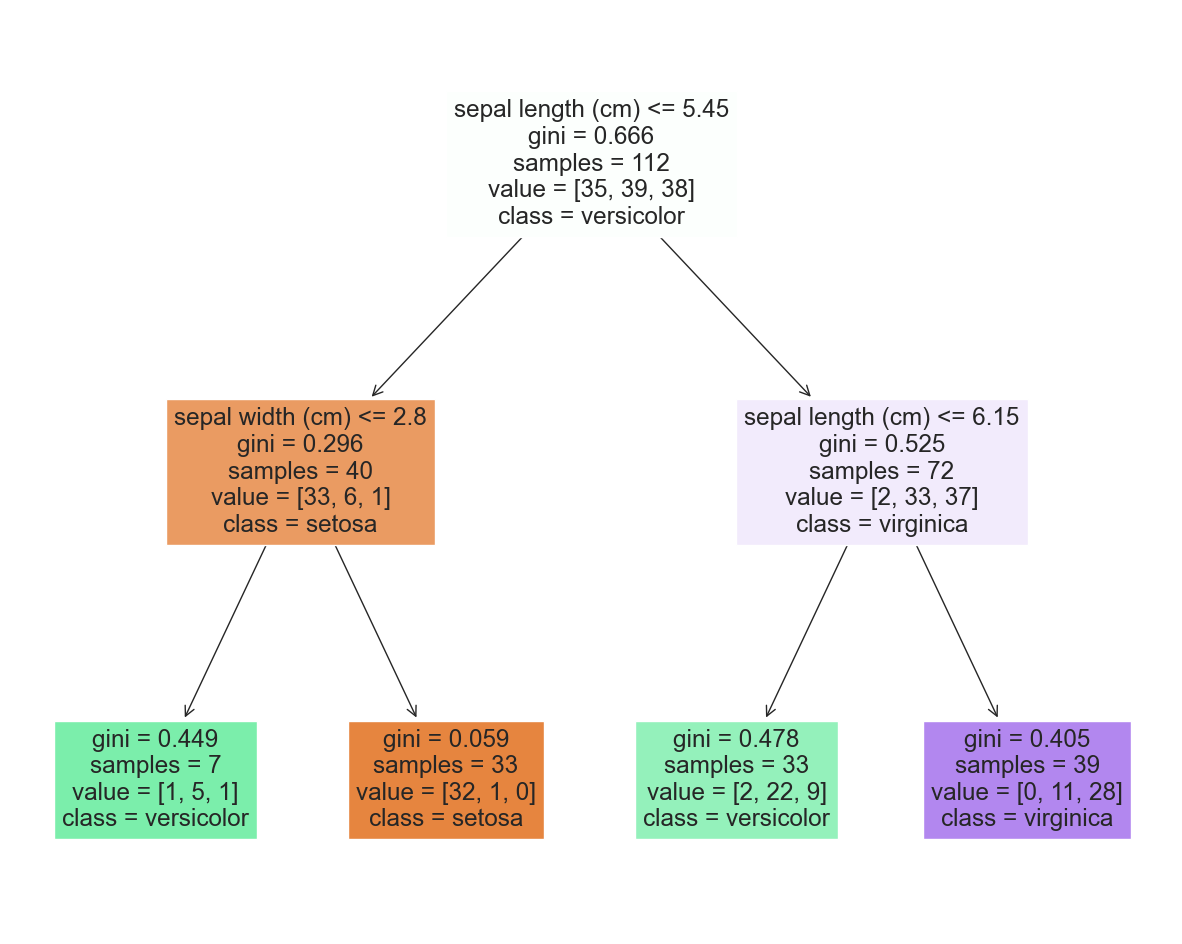

In [19]:
#Plot 

dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(x_train, y_train)

y_pred_train = dt_clf.predict(x_train)
y_pred_test = dt_clf.predict(x_test)

plt.figure(figsize=(15,12))
plot_tree(dt_clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

#This is not as expecte

In [20]:
print(accuracy_score(y_train, y_pred_train))

print(accuracy_score(y_test, y_pred_test))

0.7767857142857143
0.7631578947368421


In [22]:
#Plot the decesion boundary

plt.figure(figsize=(8,6))
x_min, x_max = x[:,0].min() -1, x[:,0].max()+1
y_min, y_max = x[:,1].min() -1, x[:,1].max()+1
xx, yy = np.meshgrid(np.array(np.arange(x_min, x_max, 0.01), 
                              np.arange(x_min, x_max, 0.01)))
z = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shapre)

plt.contourf(xx, yy, z, alpha=0.8)
plt.

TypeError: Cannot construct a dtype from an array

<Figure size 800x600 with 0 Axes>

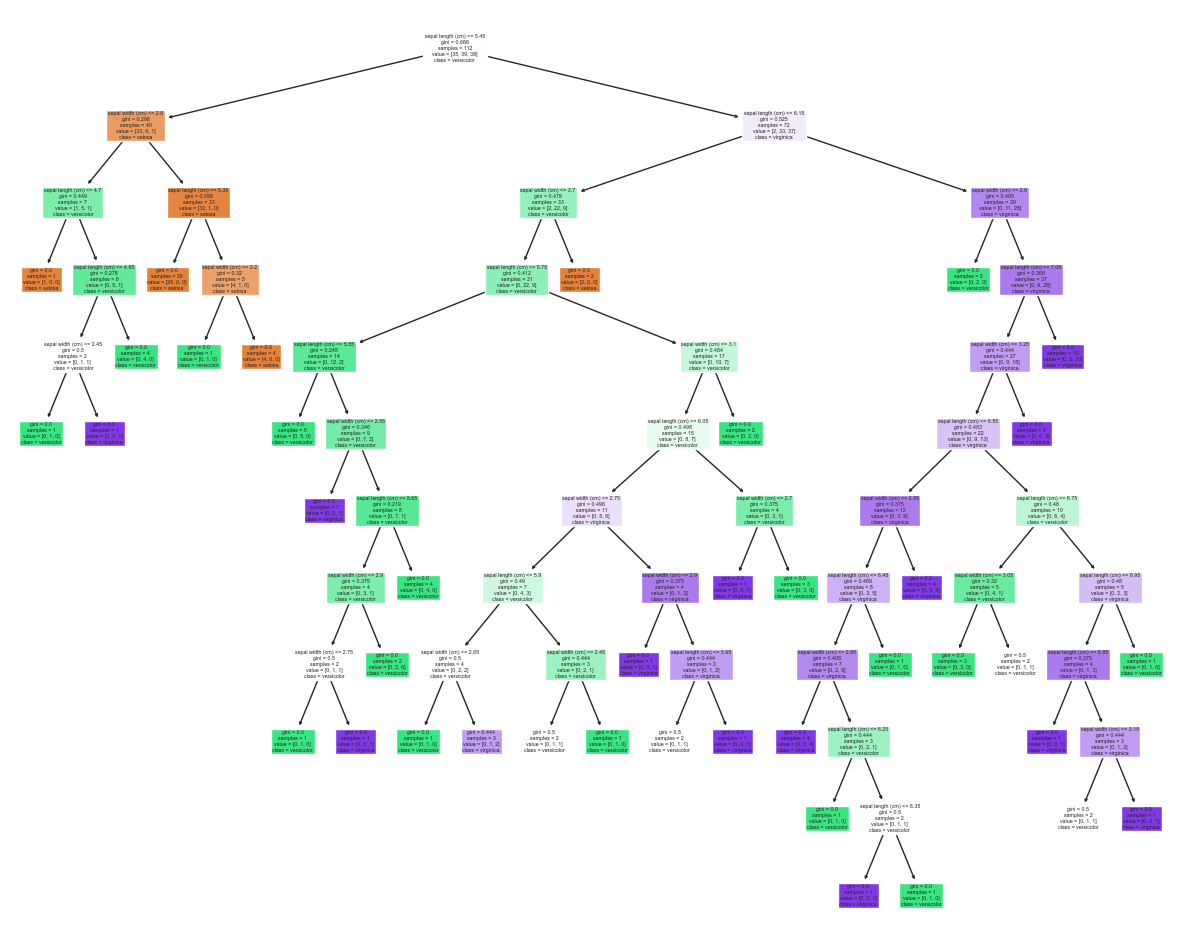

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- sepal_length <= 4.70
|   |   |   |--- class: 0
|   |   |--- sepal_length >  4.70
|   |   |   |--- sepal_length <= 4.95
|   |   |   |   |--- sepal_width <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal_width >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal_length >  4.95
|   |   |   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- sepal_length <= 5.35
|   |   |   |--- class: 0
|   |   |--- sepal_length >  5.35
|   |   |   |--- sepal_width <= 3.20
|   |   |   |   |--- class: 1
|   |   |   |--- sepal_width >  3.20
|   |   |   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- sepal_width <= 3.70
|   |   |   |--- sepal_length <= 5.75
|   |   |   |   |--- sepal_length <= 5.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal_length >  5.55
|   |   |   |   |   |--- sepal_width <= 2.55
|   |   |   |   |   |   |--- class: 2
|   |   | 

In [24]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

y_pred_train = dt_clf.predict(x_train)
y_pred_test = dt_clf.predict(x_test)

plt.figure(figsize=(15,12))
plot_tree(dt_clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

explain = export_text(dt_clf, feature_names=['sepal_length','sepal_width'])
print(explain)